# 1 - Introduction

SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_014.heart-failure`

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : Phase 1 ftds 14 Heart Failure </p>
<p> Objective : Predicting the death event </p>

## Description
The dataset used in this study is a heart failure dataset where this dataset provides information about the patient's condition at a clinic/hospital. The data contains:
1. Age, As age in years
2. Anemia, Decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase, Level of the CPK enzyme in the blood (mcg/L)
4. diabetes, If the patient has diabetes (boolean)
5. ejection_fraction, Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure, If the patient has hypertension (boolean)
7. platelets, Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine, Level of serum creatinine in the blood (mg/dL)
9. serum_sodium, Level of serum sodium in the blood (mEq/L)
10. sex, Woman or man (binary)
11. smoking, If the patient smokes or not (boolean)
12. time, Follow-up period (days)
13. death event, If the patient deceased during the follow-up period (boolean)

## Objective
Create a Classification model using Random Forest and one of the boosting algorithms to predict whether a patient decease or not.

# 2 - Import Libraries

In [441]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Split
from bitarray import test
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder # Hapus yang tidak dipakai

from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import json

# 3 - Data Loading

In [442]:
# Import data
df = pd.read_csv('h8dsft_P1G3_shafira_laksitasari.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [443]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


There is no null data present in the data set, the data type also match with the data context.

In [444]:
# Check Dataset for unique
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


The overall data contain numerical data type. Based on the information from table, the average age in this study is 60 years old. Based on the minimum and maximum age, all of the informants in this study were adults to elders. 

# 4 - Exploratory Data Analysis (EDA)

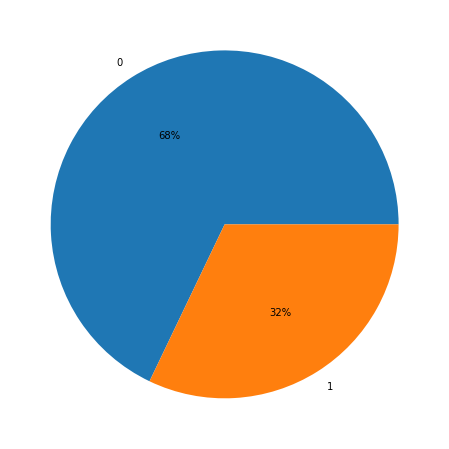

In [445]:
pie_chart_death_name = df['DEATH_EVENT'].value_counts().index.tolist()
pie_chart_death_total = df['DEATH_EVENT'].value_counts().tolist()

plt.figure(figsize = (15,8))
plt.pie(pie_chart_death_total, labels = pie_chart_death_name, autopct='%.0f%%')
plt.show()

Description : Death Event (0=No, 1=Yes)

Based on data from patient information, out of 299 patients, 32% were deceased. It means in followed up period after their heart being checked, 32% of patients were died from age between 42 until 95 years old. The deceased were only informed on heart failure prespective, if there are any other complications it not described in the data.

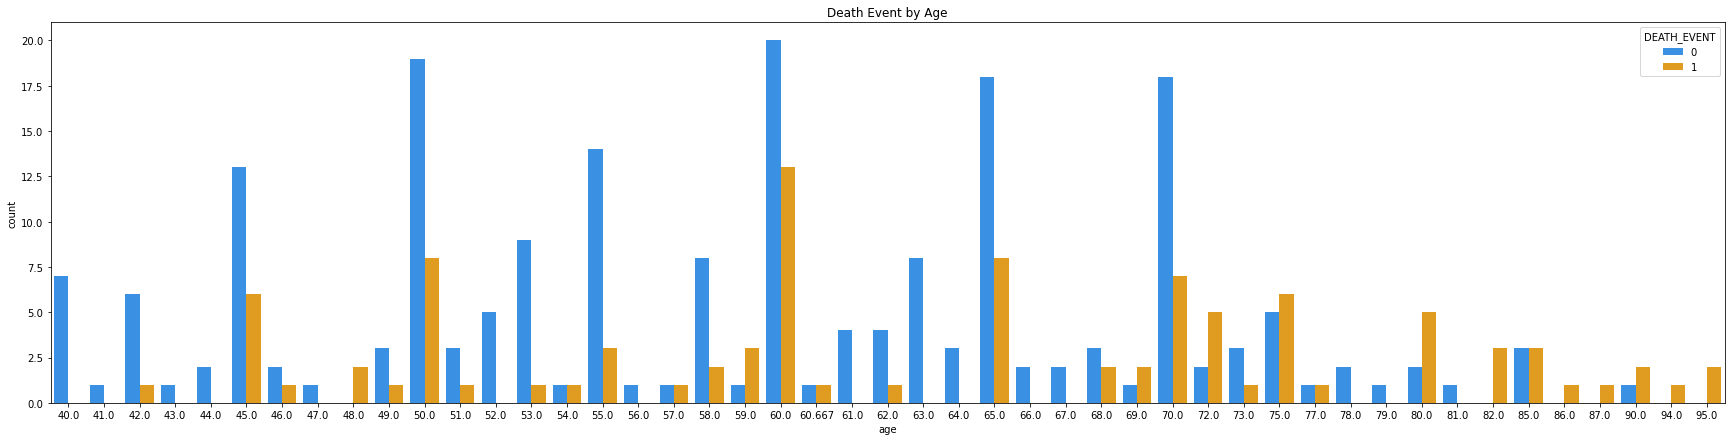

In [446]:
plt.figure(figsize = (30,7))
sns.countplot(x='age', data=df, hue='DEATH_EVENT',palette=['dodgerblue','orange'])
plt.title('Death Event by Age')
plt.show()

In [447]:
death_by_age_0 = df[(df['DEATH_EVENT'] == 0)]['age']
death_by_age_1 = df[(df['DEATH_EVENT'] == 1)]['age']

death_by_age_1.value_counts().head(3)

60.0    13
65.0     8
50.0     8
Name: age, dtype: int64

From the age plot above, it can be seen that the patients who experienced death most were those aged 60 years, followed by 65 years which is equivalent to 50 years. The number of those who died at that age was huge among others age because the number of those aged was indeed the most dominant in the dataset. Beside the age factor, there are several conditions that cause heart failure.

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

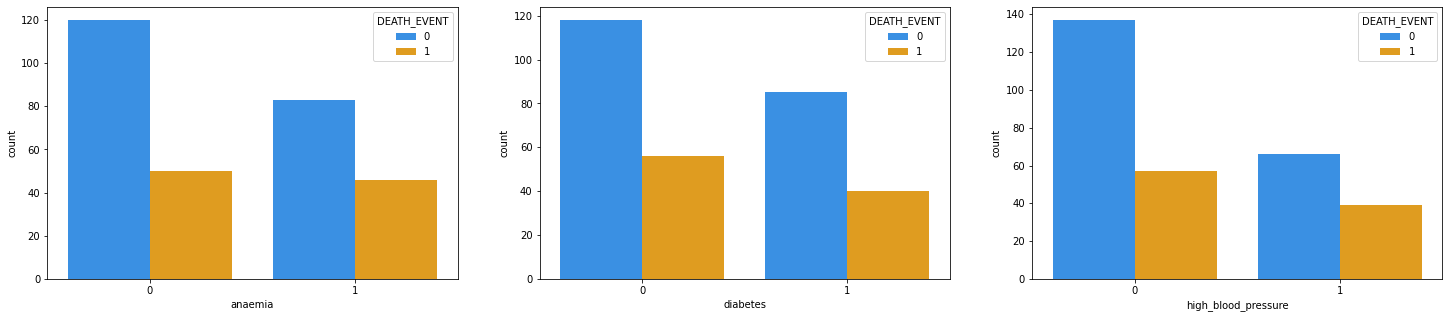

In [448]:
fig, ax =plt.subplots(1,3, figsize = (25,5))
sns.countplot(x='anaemia', data=df, order = df.anaemia.value_counts().index, hue='DEATH_EVENT', palette=['dodgerblue','orange'], ax=ax[0])
sns.countplot(x='diabetes', data=df, order = df.diabetes.value_counts().index, hue='DEATH_EVENT', palette=['dodgerblue','orange'], ax=ax[1])
sns.countplot(x='high_blood_pressure', data=df, order = df.high_blood_pressure.value_counts().index, hue='DEATH_EVENT', palette=['dodgerblue','orange'], ax=ax[2])

Description : (0=No, 1=Yes)

The dataset also provides other condition that trigger a individual short lifespan, namely anemia, diabetes, high blood pressure, and smoking. Anemia is a condition when the body lacks red blood cells. Diabetes is a condition which causes the level of sugar (glucose) in the blood become too high. High blood pressure is caused by a buildup of fat in the arteries. These three condition can also caused heart failure. In patients, the number of people who have anaemia is less than those who haven't. Likewise with diabetes, and high blood pressure. There are also some patients who suffer from all these conditions, the number can be seen from the value counts below.

In [449]:
df[(df['anaemia'] == 1) &
    (df['diabetes'] == 1) &
    (df['high_blood_pressure'] == 1)]['DEATH_EVENT'].value_counts()

0    11
1     6
Name: DEATH_EVENT, dtype: int64

However, it can be seen that if someone has these three conditions, many still survive. It is possible that the critical level of each patient is different, but there are also patients who do not have any of these conditions but are deceased and eventhough that person still 45 years old. As information, being obese or having a family history of CHD (Coronary heart disease) may increase the heart risk.

In [450]:
df[(df['anaemia'] == 0) &
    (df['diabetes'] == 0) &
    (df['high_blood_pressure'] == 0) &
    (df['DEATH_EVENT'] == 1)]['age'].min()

45.0

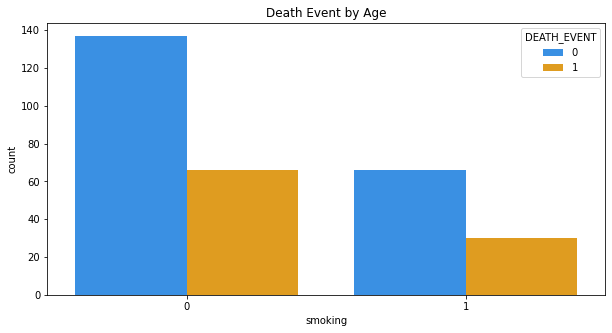

In [451]:
plt.figure(figsize = (10,5))
sns.countplot(x='smoking', data=df, hue='DEATH_EVENT',palette=['dodgerblue','orange'])
plt.title('Death Event by Age')
plt.show()

In [452]:
df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

From the information, there are 203 patients do not smoke and 96 patients are smoke. When viewed from the graph, the ratio of deaths of smokers and non-smokers is almost similiar but nicotine and carbonmonoxide certainly affect people heart. It is not explained in the information in the dataset that the person is a heavy smoker or not because if the person is a heavy smoker, the higher the probability of not surviving heart risk.

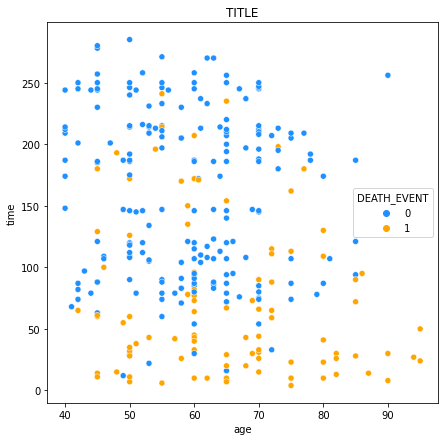

In [453]:
plt.figure(figsize = (7,7))
sns.scatterplot(x='age', y='time', data=df, hue='DEATH_EVENT', palette=['dodgerblue','orange'])
plt.title('TITLE')
plt.show()

Based on the scatter plot above, most of the patients who deceased were treated only in short time. This can be caused by late treatment of the disease directly. Some of them probably do not do any constant medical check up so when the heart already in the verge of failure sometimes it was too late for treatment.

<Figure size 720x504 with 0 Axes>

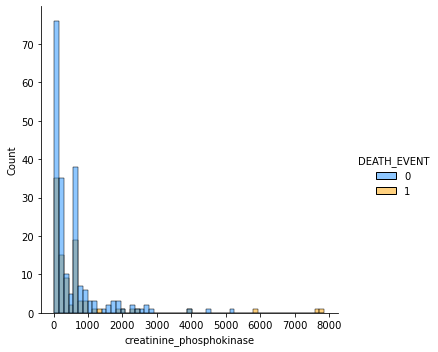

In [454]:
plt.figure(figsize=(10,7))
sns.displot(df, x="creatinine_phosphokinase", hue="DEATH_EVENT", palette=['dodgerblue','orange'])

Creatine phosphokinase (CKP) can be found in heart muscle. Levels of this enzyme can increase after a heart attack, muscle injury, strenuous exercise, excessive alcohol consumption, or the use of certain drugs. The CPK range for those who survived was 30-5209 while those that did not survive were 23-7861. When viewed from the CPK range in the diagram above, those with very large CPK tend to not survive.


<Figure size 720x504 with 0 Axes>

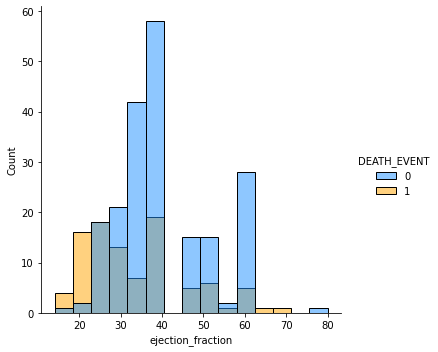

In [455]:

plt.figure(figsize=(10,7))
sns.displot(df, x="ejection_fraction", hue="DEATH_EVENT", palette=['dodgerblue','orange'])

EF or Ejection Fraction is the percentage of blood pumped out by the left ventricle when it contracts. Normally, the EF value is between 50-70%. The range for survived is 14 - 70 % while the reange who not is 17 - 80%. Based on that information, any range of EF could be survived.

<Figure size 720x504 with 0 Axes>

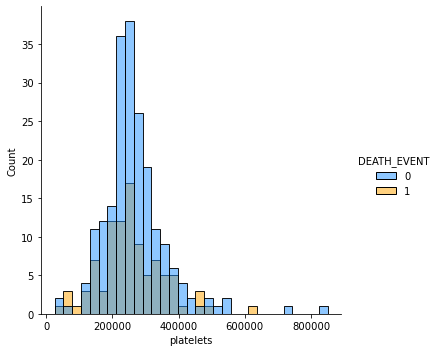

In [456]:

plt.figure(figsize=(10,7))
sns.displot(df, x="platelets", hue="DEATH_EVENT", palette=['dodgerblue','orange'])

Platelets are pieces of blood produced by the bone marrow. The normal number is around 150,000 to 450,000 platelets per microlite. High platelets can cause damage to red blood cells, which cause the formation of blood clots. Based on the graph above, the range of survivors is 25100 - 850000 platelets per microlite while those who do not survive are 47000 - 621000 platelets per microlite. Since the data is imbalance, there is no specific range how much Platelets can lead to deceased.

<Figure size 720x504 with 0 Axes>

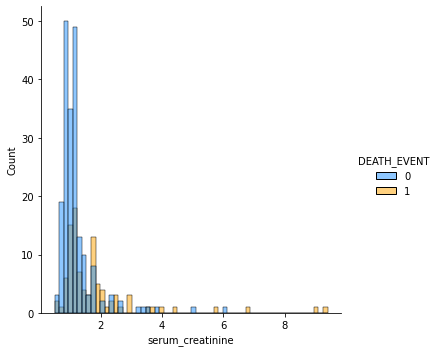

In [457]:
plt.figure(figsize=(10,7))
sns.displot(df, x="serum_creatinine", hue="DEATH_EVENT", palette=['dodgerblue','orange'])


Serum creatinine is a waste product of muscle metabolism that flows in the blood circulation. The normal value for serum creatinine in men is 0.7 - 1.3 mg/dL, while in women it is 0.6 - 1.1 mg/dL. The serum range for those who survived was 0.5 - 6 mg/dL while those who did not survived were 0.6 - 9.4 mg/dL. It can be concluded that most of the deceased are those with high serum creatinine.

<Figure size 720x504 with 0 Axes>

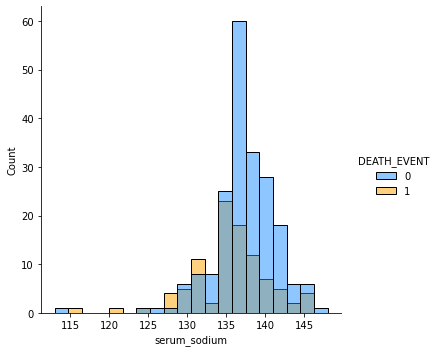

In [458]:
plt.figure(figsize=(10,7))
sns.displot(df, x="serum_sodium", hue="DEATH_EVENT", palette=['dodgerblue','orange'])

In [459]:
df[(df['DEATH_EVENT'] == 0)]['serum_sodium'].describe()

count    203.000000
mean     137.216749
std        3.982923
min      113.000000
25%      135.500000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

The normal range of sodium is 135 to 145 mmol/L. In survived people the range of sodium serum is 113 - 148 mol/L while the not survived people have sodium range 116 - 146 mol/L. The range for both survived and not survived are not too significant, but serum sodium can occured in blood which involving heart activity. 

In [460]:
df[(df['DEATH_EVENT'] == 1)]['serum_sodium'].describe()

count     96.000000
mean     135.375000
std        5.001579
min      116.000000
25%      133.000000
50%      135.500000
75%      138.250000
max      146.000000
Name: serum_sodium, dtype: float64

From some of the explanations above, there are many things that can cause a person to have heart failure. Any of these factors, levels, or limits that are unusual can lead to heart failure. Later all variables will be used in the feature to determine whether the patient is most likely to deceased or not.

# 5 - Data Prepocessing

## Get Inference

In [461]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 50) #change random state
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
73,55.0,0,336,0,45,1,324000.00,0.9,140,0,0,74,0
102,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
160,45.0,0,2442,1,30,0,334000.00,1.1,139,1,0,129,1
148,45.0,1,66,1,25,0,233000.00,0.8,135,1,0,230,0
24,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
187,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,145,0
281,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
239,63.0,1,582,0,40,0,448000.00,0.9,137,1,1,123,0
37,70.0,0,81,1,35,1,533000.00,1.3,139,0,0,212,0
270,72.0,0,127,1,50,1,218000.00,1.0,134,1,0,33,0


In [462]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


In [463]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,336,0,45,1,324000.00,0.9,140,0,0,74,0
1,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
2,45.0,0,2442,1,30,0,334000.00,1.1,139,1,0,129,1
3,45.0,1,66,1,25,0,233000.00,0.8,135,1,0,230,0
4,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1
5,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,145,0
6,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
7,63.0,1,582,0,40,0,448000.00,0.9,137,1,1,123,0
8,70.0,0,81,1,35,1,533000.00,1.3,139,0,0,212,0
9,72.0,0,127,1,50,1,218000.00,1.0,134,1,0,33,0


## Feature Selection

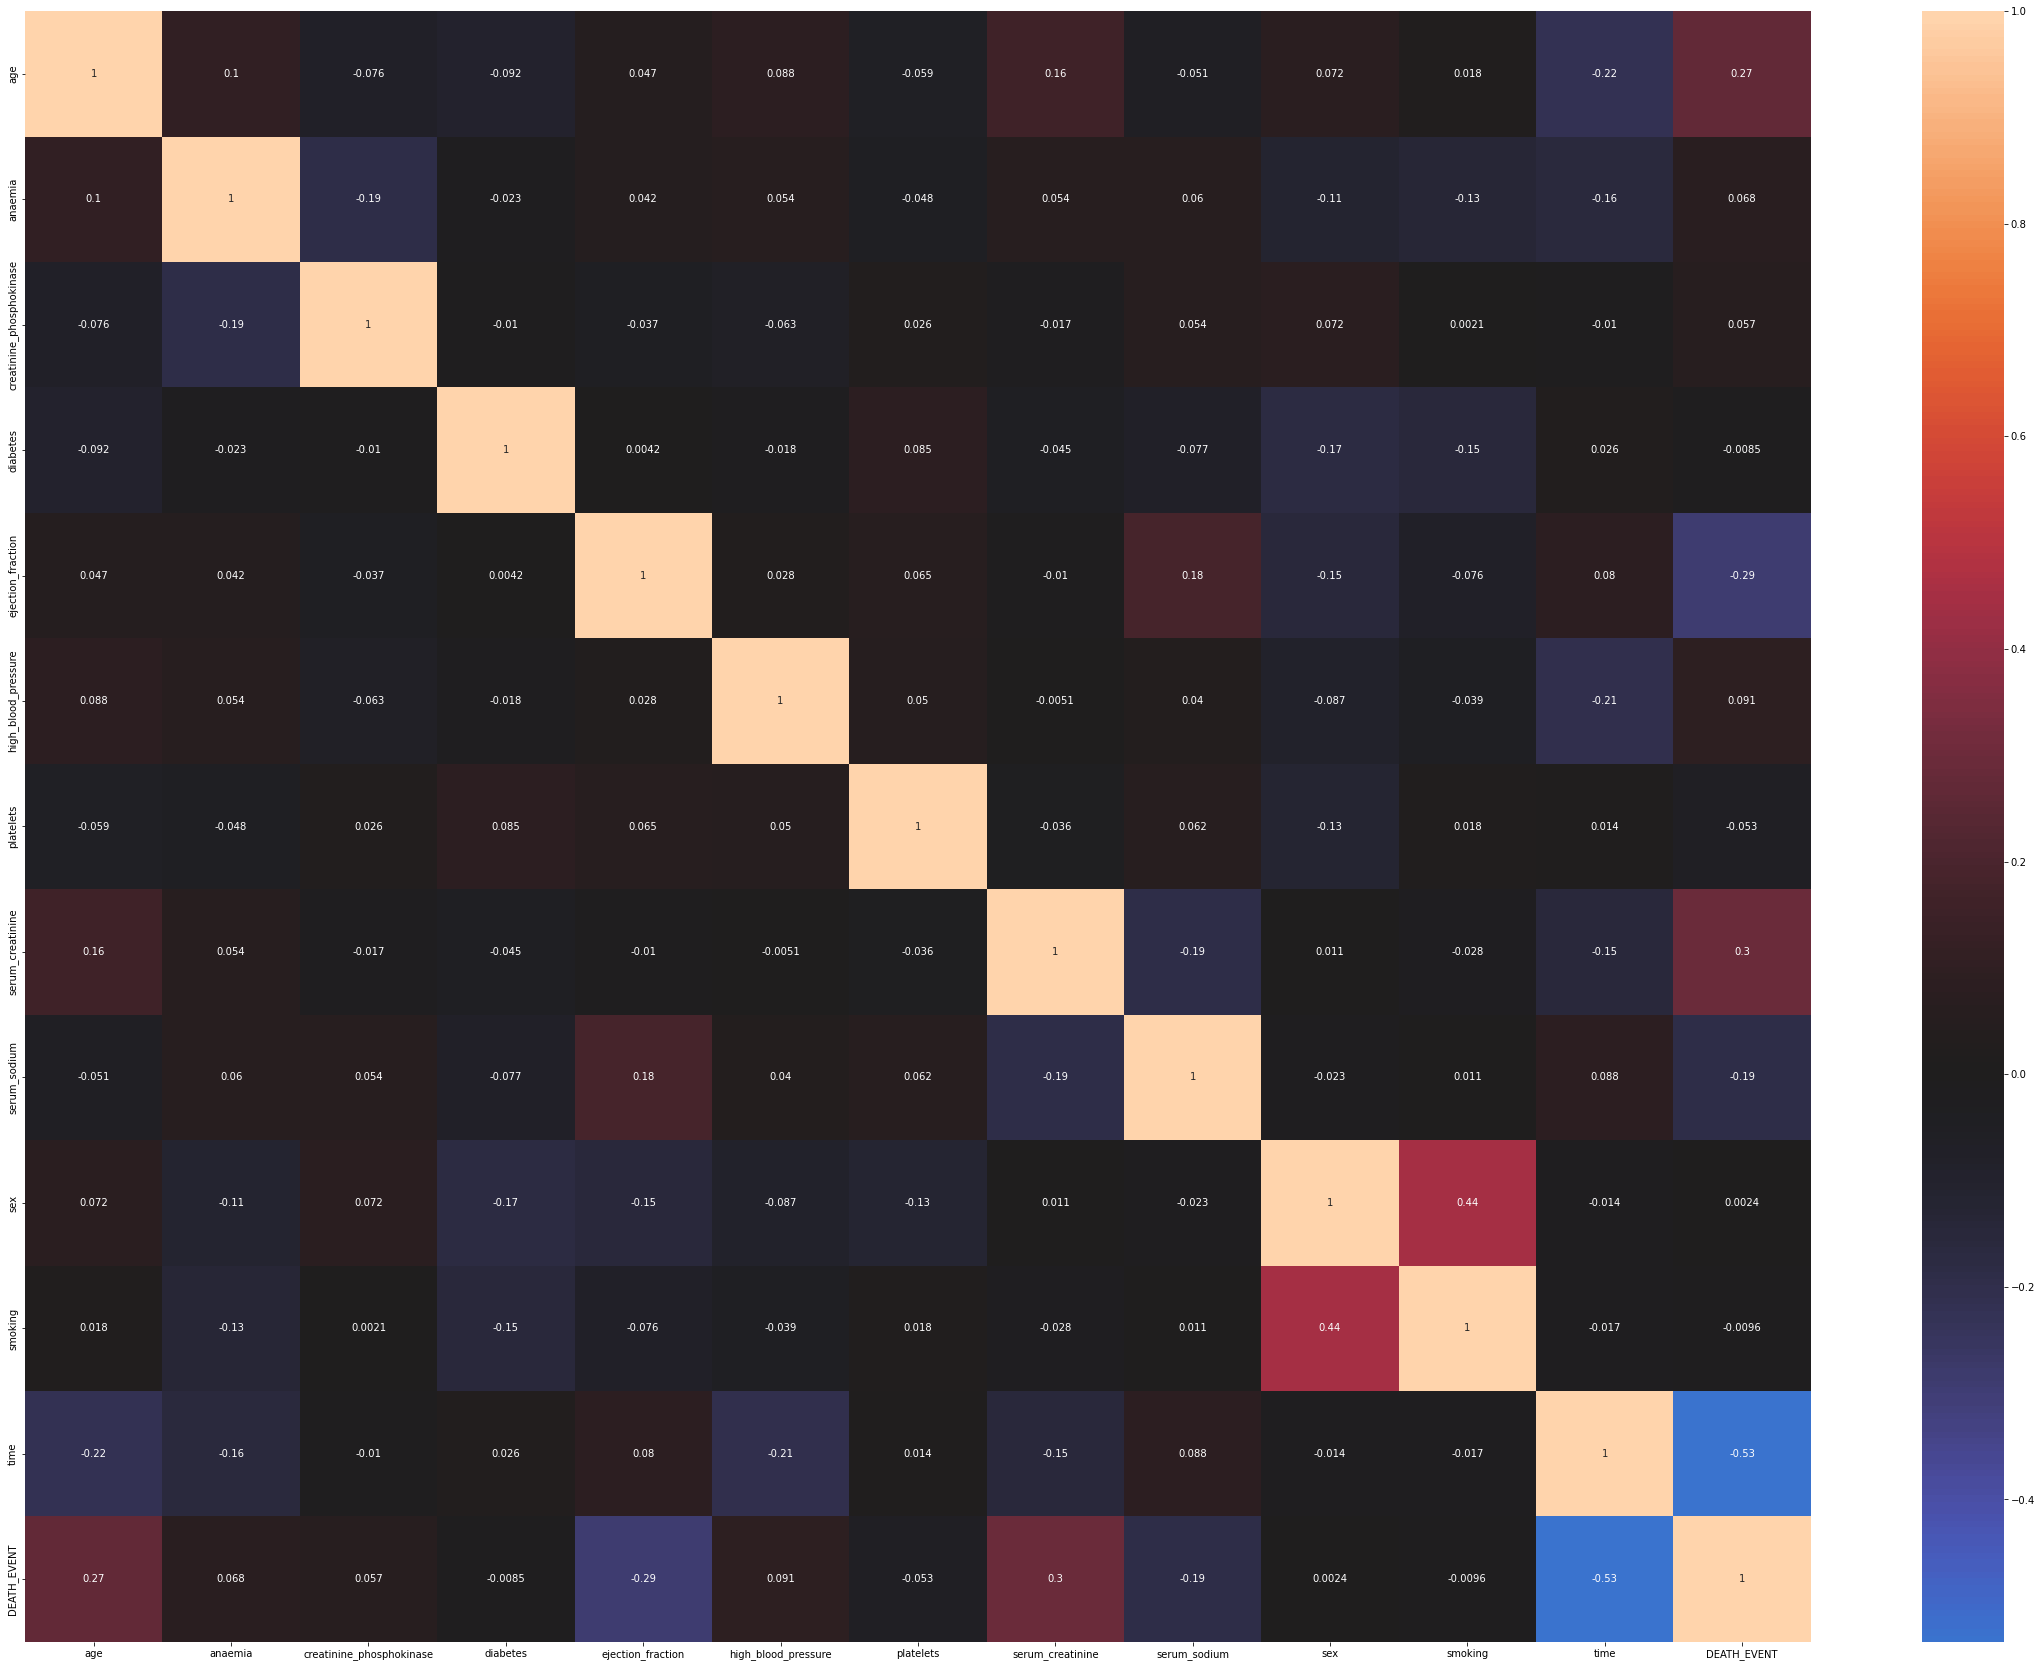

In [464]:
# Display Heatmap

train_test_corr = df_train_test.corr()

plt.figure(figsize=(40, 30))
sns.heatmap(train_test_corr, annot= True, center=0)
plt.show()

Based on the Heatmap, the variables that are most closely correlated with death events are time, serumm_creatinine, age, ejection_fraction, and serum sodium, while the rest that are close to 0 are considered quite far in correlation. However, because all of the above variables affect human health factors, all of the above variables will be used as features to predict mortality.
1. Age, Usually the older a person is, the weaker their heart function is.
2. Anemia, when a person lack of oxygen level, a heart will pumped harder to create more blood create which caused a heart failure
3. creatinine_phosphokinase, the higher the CPK means there are  there has been injury or stress to muscle tissue, the heart, or the brain which affect health.
4. diabetes, diabetes majorly increases the risk of many heart problems that lead to death.
5. ejection_fraction, based on EDA can affect heart risk.
6. high_blood_pressure, based on EDA can affect heart risk.
7. platelets, based on EDA can affect heart risk.
8. serum_creatinine, based on EDA can affect heart risk.
9. serum_sodium, based on EDA can affect heart risk.
10. sex, researchers have found that sex  make a difference when it comes to  disease, respond to medications, and how often to seek medical care.
11. smoking, nicotine can cause a heart risk
12. time, give information about the day after the period of follow up.

## Splitting between 'X' (Features) and 'y' (Target)

In [465]:
# Splitting Features and Target

X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186
...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215


In [466]:
# Splitting train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=13) 

# Checking train and test size

print('Features Train Size : ', X_train.shape,', Target Train Size : ', y_train.shape)
print('Features Test Size : ', X_test.shape,', Target Test Size : ', y_test.shape)

Features Train Size :  (239, 12) , Target Train Size :  (239,)
Features Test Size :  (60, 12) , Target Test Size :  (60,)


## Handling Missing Values

### Features Train

In [467]:
# Checking missing value in features train

X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

### Features Test

In [468]:
# Checking missing value in features test

X_test.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

### Target Train

In [469]:
# Checking missing value in target train

y_train.isnull().sum()

0

### Target Test

In [470]:
# Checking missing value in target test

y_test.isnull().sum()

0

There is no missing value or false value from current features and target.

## Handling Outlier

<AxesSubplot:title={'center':'time distribution'}>

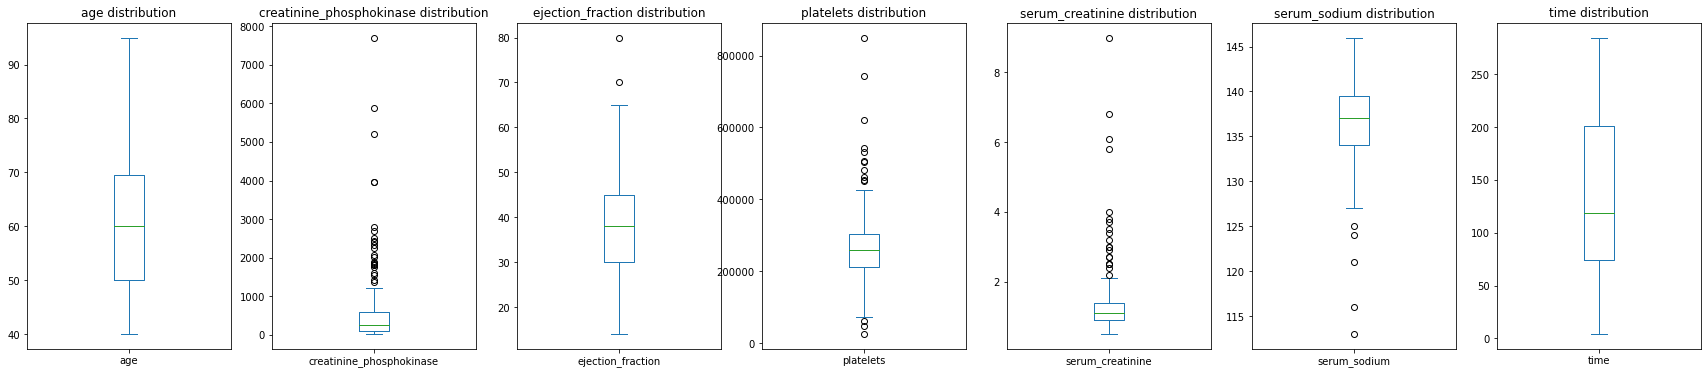

In [471]:
fig, ax =plt.subplots(1,7, figsize = (30,6))
X_train['age'].plot(kind='box', title='age distribution',ax=ax[0])
X_train['creatinine_phosphokinase'].plot(kind='box', title='creatinine_phosphokinase distribution',ax=ax[1])
X_train['ejection_fraction'].plot(kind='box', title='ejection_fraction distribution',ax=ax[2])
X_train['platelets'].plot(kind='box', title='platelets distribution',ax=ax[3])
X_train['serum_creatinine'].plot(kind='box', title='serum_creatinine distribution',ax=ax[4])
X_train['serum_sodium'].plot(kind='box', title='serum_sodium distribution',ax=ax[5])
X_train['time'].plot(kind='box', title='time distribution',ax=ax[6])



From the Box Plot above, there is continuous data that has outliers, but because later modeling will be carried out using the Random Forest and Boosting algorithms which are not sensitive to outliers, for now outliers will not be handled.

## Split between Numerical Columns and Categorical Columns

## Feature Scaling and Encoding

,0,1,2,3,4,5,6
features,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
Skew,0.446977,4.26528,0.591151,1.62128,4.39797,-1.264888,0.099447


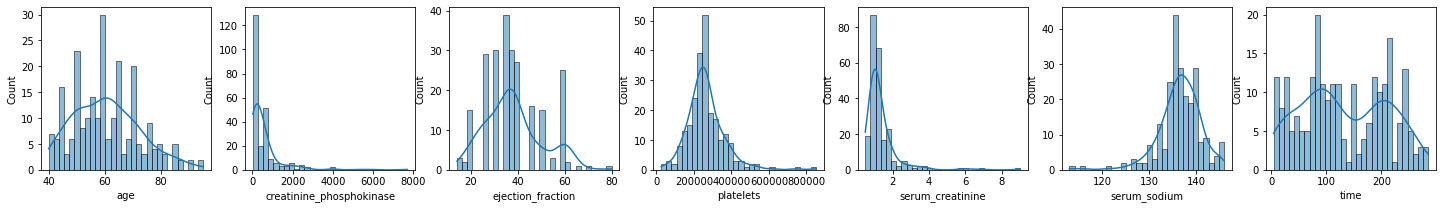

In [472]:
# Display Numerical Histo Plotand Skewness
fig, ax =plt.subplots(1,7, figsize = (25,3))
sns.histplot(X_train['age'], bins=30, kde=True, ax=ax[0])
sns.histplot(X_train['creatinine_phosphokinase'], bins=30, kde=True, ax=ax[1])
sns.histplot(X_train['ejection_fraction'], bins=30, kde=True, ax=ax[2])
sns.histplot(X_train['platelets'], bins=30, kde=True, ax=ax[3])
sns.histplot(X_train['serum_creatinine'], bins=30, kde=True, ax=ax[4])
sns.histplot(X_train['serum_sodium'], bins=30, kde=True, ax=ax[5])
sns.histplot(X_train['time'], bins=30, kde=True, ax=ax[6])

data_skewness = pd.DataFrame(columns=["features", "Skew"], 
                                data=[['age',X_train['age'].skew()],
                                    ['creatinine_phosphokinase',X_train['creatinine_phosphokinase'].skew()],
                                    ['ejection_fraction', X_train['ejection_fraction'].skew()],
                                    ['platelets', X_train['platelets'].skew()],
                                    ['serum_creatinine',X_train['serum_creatinine'].skew()],
                                    ['serum_sodium',X_train['serum_sodium'].skew()],
                                    ['time',X_train['time'].skew()]
                                    ])

data_skewness.T

When viewed from the histogram plot, some data are Normal and some data are skewed. Therefore, data without outliers will be scaled with min max while those with outliers will be scaled with Robust Scaler. Because the categorical is already in binary form, some categorical will not be encoded. However, there is one categorical, namely sex which will be encoded with OHE because gender in this case is not included in the ordinal.

In [473]:
# Split numerical and categorical based on dt types

num_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_columns = X.loc[:, ~X.columns.isin(num_columns)].columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

# Split Train-Set and Train-Set based on Column Types

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

# Checking features and target length

print('\nFeatures Train numeric length = ', len(X_train_num))
print('Features Train categorical length = ', len(X_train_cat))
print('Features Test numeric length = ', len(X_test_num))
print('Features Test caategorical length = ', len(X_test_cat))


Numerical Columns :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
Categorical Columns :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

Features Train numeric length =  239
Features Train categorical length =  239
Features Test numeric length =  60
Features Test caategorical length =  60


In [474]:
num_split_minmax = ['age','time']
num_split_robust = X_train_num.loc[:, ~X_train_num.columns.isin(num_split_minmax)].columns.tolist()
cat_split_ohe = ['sex']

# Define Pipeline for Scaling
num_minmax_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             MinMaxScaler()
                             )
num_robust_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             RobustScaler()
                             )
num_standard_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler()
                             )
cat_ohe_pipeline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore')) 

# Merging scaling/encoding with column which need to be scaling/encoding
data_pipeline = ColumnTransformer([
    ('pipeline_minmax', num_minmax_pipeline, num_split_minmax)
    , ('pipeline_robust', num_robust_pipeline, num_split_robust)
    , ('pipeline_ohe', cat_ohe_pipeline, cat_split_ohe)
])

# 6 - Model Definition

According to study case, the model we will used to predict the death is Random Forest Classifier and one of boosting algorithm. The boosting algorithm choosen for this case is Gradien Boosting Classifier. After experimenting with several booster algorithms such as Ada and XGBoost, Gradient is considered to have better results and is closer to Random Forest.

In [475]:
# Training using Random Forest

rndm_forest_pipeline = make_pipeline(data_pipeline, RandomForestClassifier(criterion='gini', n_estimators=100, ccp_alpha=0))

In [476]:
# Training using Boost

grad_clf_pipeline = make_pipeline(data_pipeline, GradientBoostingClassifier(n_estimators=100))


The n estimator does not differ the result by any number but the result often change after rerun even when the hyperparameter does not change at all.

# 7 - Model Training

In [477]:
# Training using Random Forest

rndm_forest_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline_minmax',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'time']),
                                                 ('pipeline_robust',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                              

In [478]:
# Training using Gradient Boosting

grad_clf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline_minmax',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'time']),
                                                 ('pipeline_robust',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                              

# 8 - Model Evaluation

Random Forest
---

Random Forest accuracy score train :  1.0
Random Forest accuracy score test :  0.9 

Random Forest classification report train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        76

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239
 

Random Forest classification report test : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.89      0.80      0.84        20

    accuracy                           0.90        60
   macro avg       0.90      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60

Random Forest Confusion matrix - Train (Left) and Test(Right)


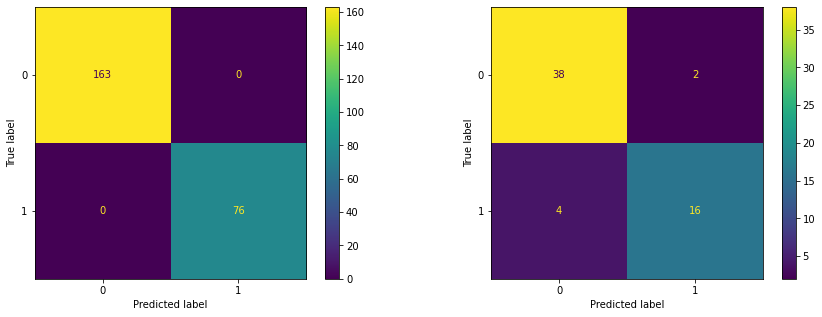

In [479]:
# Predict Random Forest model

rndm_forest_y_pred_train = rndm_forest_pipeline.predict(X_train)
rndm_forest_y_pred_test = rndm_forest_pipeline.predict(X_test)

# Display Random Forest Accuracy

print('Random Forest accuracy score train : ',accuracy_score(y_train,rndm_forest_y_pred_train))
print('Random Forest accuracy score test : ',accuracy_score(y_test,rndm_forest_y_pred_test),'\n')

# Display Random Forest Classification Report

print('Random Forest classification report train : \n',classification_report(y_train,rndm_forest_y_pred_train),'\n')
print('Random Forest classification report test : \n',classification_report(y_test,rndm_forest_y_pred_test))

# Display Random Forest Confusion matrix - Train (Left) and Test(Right)

print('Random Forest Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_rndm_forest_train = confusion_matrix(y_train, rndm_forest_y_pred_train, labels=rndm_forest_pipeline.classes_)
disprndm_forest_train = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_train,display_labels=rndm_forest_pipeline.classes_)
disprndm_forest_train.plot(ax=ax[0])
cm_rndm_forest_test = confusion_matrix(y_test, rndm_forest_y_pred_test, labels=rndm_forest_pipeline.classes_)
disp_rndm_forest_test = ConfusionMatrixDisplay(confusion_matrix=cm_rndm_forest_test,display_labels=rndm_forest_pipeline.classes_)

disp_rndm_forest_test.plot(ax=ax[1])
plt.show()

Based on the results obtained, it can be concluded that in Random Forest, the train results have good accuracy but are still experiencing overfitting. In train, precision, recall and F1 the score is perfect one, meaning that all data are predicted correctly. But in the test there are still missclassification because the accuracy is still 0.9. When viewed from precision, recall, and F1 scores, the performance value is still not as good as in the train.

Boosting
---

Gradient Booster accuracy score train :  1.0
Gradient Booster accuracy score test :  0.8833333333333333 

Gradient Booster classification report train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        76

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239
 

Gradient Booster classification report test : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.84      0.80      0.82        20

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60

Gradient Booster Confusion matrix - Train (Left) and Test(Right)


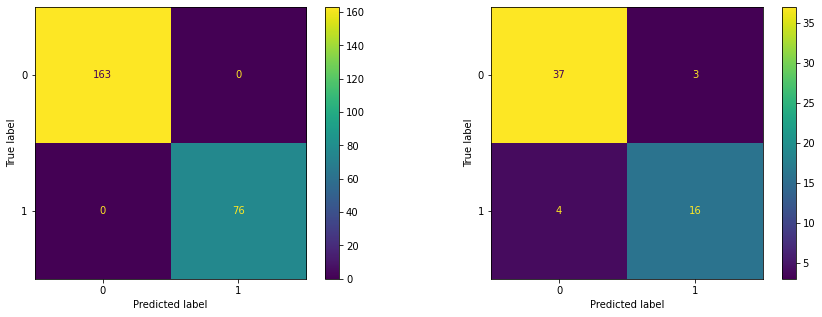

In [480]:
# Predict Gradient Booster model

grad_clf_y_pred_train = grad_clf_pipeline.predict(X_train)
grad_clf_y_pred_test = grad_clf_pipeline.predict(X_test)

# Display Gradient Booster Accuracy

print('Gradient Booster accuracy score train : ',accuracy_score(y_train,grad_clf_y_pred_train))
print('Gradient Booster accuracy score test : ',accuracy_score(y_test,grad_clf_y_pred_test),'\n')

# Display Gradient Booster Classification Report

print('Gradient Booster classification report train : \n',classification_report(y_train,grad_clf_y_pred_train),'\n')
print('Gradient Booster classification report test : \n',classification_report(y_test,grad_clf_y_pred_test))

# Display Gradient Booster Confusion matrix - Train (Left) and Test(Right)

print('Gradient Booster Confusion matrix - Train (Left) and Test(Right)')

fig, ax =plt.subplots(1,2, figsize = (15,5))
cm_grad_clf_train = confusion_matrix(y_train, grad_clf_y_pred_train, labels=grad_clf_pipeline.classes_)
dispgrad_clf_train = ConfusionMatrixDisplay(confusion_matrix=cm_grad_clf_train,display_labels=grad_clf_pipeline.classes_)
dispgrad_clf_train.plot(ax=ax[0])
cm_grad_clf_test = confusion_matrix(y_test, grad_clf_y_pred_test, labels=grad_clf_pipeline.classes_)
disp_grad_clf_test = ConfusionMatrixDisplay(confusion_matrix=cm_grad_clf_test,display_labels=grad_clf_pipeline.classes_)

disp_grad_clf_test.plot(ax=ax[1])
plt.show()



The results for Random Forest and Adaboost are almost the same, there is still overfitting between train and test with the results of performance matrices being almost similiar as Random Forest.

In this case, a case involving a person's life, it is better to reduce False positives. It means is that if the True positive is 0 or not deceased, then the false positive is the patient who is predicted not to be deceased but turns out to be deceased. This is very dangerous because if it is not handled properly it will harm the patient, and the patient's family. And even hospitals can be sued which can result in losses. Therefore, the recall can be increased to max value which is value 1.

Because the Random and Gradient models are not too different, it is still recommended to use the Random Forest algorithm because the F1 score is still higher than the Gradient Booster.

# 9 - Model Inference

In [481]:
# Model Inference prediction
rndm_forest_inf = pd.DataFrame(rndm_forest_pipeline.predict(df_inf), columns=['Death Event - Random Forest Pred'])
grad_clf_inf = pd.DataFrame(grad_clf_pipeline.predict(df_inf), columns=['Death Event - Grad Pred'])

In [482]:
df_inf_with_pred = pd.concat([df_inf, rndm_forest_inf, grad_clf_inf ], axis = 1)
df_inf_with_pred

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Death Event - Random Forest Pred,Death Event - Grad Pred
0,55.0,0,336,0,45,1,324000.00,0.9,140,0,0,74,0,0,0
1,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,1,1
2,45.0,0,2442,1,30,0,334000.00,1.1,139,1,0,129,1,1,1
3,45.0,1,66,1,25,0,233000.00,0.8,135,1,0,230,0,0,0
4,48.0,1,131,1,30,1,244000.00,1.6,130,0,0,193,1,1,1
5,51.0,1,582,1,35,0,263358.03,1.5,136,1,1,145,0,0,0
6,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1,1,1
7,63.0,1,582,0,40,0,448000.00,0.9,137,1,1,123,0,0,0
8,70.0,0,81,1,35,1,533000.00,1.3,139,0,0,212,0,0,0
9,72.0,0,127,1,50,1,218000.00,1.0,134,1,0,33,0,0,0


In [483]:
df_inf_with_pred[['DEATH_EVENT','Death Event - Random Forest Pred','Death Event - Grad Pred']]

,DEATH_EVENT,Death Event - Random Forest Pred,Death Event - Grad Pred
0,0,0,0
1,1,1,1
2,1,1,1
3,0,0,0
4,1,1,1
5,0,0,0
6,1,1,1
7,0,0,0
8,0,0,0
9,0,0,0


In the inference model, Random forest and Gradient Boosting managed to predict accurately.  However, if a model is needed, the Random Forest with a decision tree base estimator is still the best to make predictions.

# 11 - Conclusion

Based on EDA,
- Based on data from patient information, out of 299 patients, 32% were deceased. It means in followed up period after their heart being checked, 32% of patients were died from age between 42 until 95 years old. The deceased were only informed on heart failure prespective, if there are any other complications it not described in the data.
- The patients who experienced death most were those aged 60 years, followed by 65 years which is equivalent to 50 years. The number of those who died at that age was huge among others age because the number of those aged was indeed the most dominant in the dataset. Beside the age factor, there are several conditions that cause heart failure.
- The dataset also provides other condition that trigger a individual short lifespan, namely anemia, diabetes, and high blood pressure. These three condition can also caused heart failure. In patients, the number of people who have anaemia is less than those who haven't. Likewise with diabetes, and high blood pressure. There are also some patients who suffer from all three conditions.
- However, if someone has anemia, diabetes, high blood pressure conditions, many still survive. It is possible that the critical level of each patient is different, but there are also patients who do not have any of these conditions but are deceased and eventhough that person still 45 years old. As information, being obese or having a family history of CHD (Coronary heart disease) may increase the heart risk.
- From the information, there are 203 patients do not smoke and 96 patients are smoke. The ratio of deaths of smokers and non-smokers is almost similiar but nicotine and carbonmonoxide certainly affect people heart. It is not explained in the information in the dataset that the person is a heavy smoker or not because if the person is a heavy smoker, the higher the probability of not surviving heart risk.
- Most of the patients who deceased were treated only in short time. This can be caused by late treatment of the disease directly. Some of them probably do not do any constant medical check up so when the heart already in the verge of failure sometimes it was too late for treatment.
- Levels of CKP can increase after a heart attack, muscle injury, strenuous exercise, excessive alcohol consumption, or the use of certain drugs. The CPK range for those who survived was 30-5209 while those that did not survive were 23-7861. Those with very large CPK tend to not survive.
- Normally, the EF value is between 50-70%. The range for survived is 14 - 70 % while the reange who not is 17 - 80%. Based on that information, any range of EF could be survived.
- The normal number is around 150,000 to 450,000 platelets per microlite. The range of survivors is 25100 - 850000 platelets per microlite while those who do not survive are 47000 - 621000 platelets per microlite. Since the data is imbalance, there is no specific range how much Platelets can lead to deceased.
- The normal value for serum creatinine in men is 0.7 - 1.3 mg/dL, while in women it is 0.6 - 1.1 mg/dL. The serum range for those who survived was 0.5 - 6 mg/dL while those who did not survived were 0.6 - 9.4 mg/dL. It can be concluded that most of the deceased are those with high serum creatinine.
- The normal range of sodium is 135 to 145 mmol/L. In survived people the range of sodium serum is 113 - 148 mol/L while the not survived people have sodium range 116 - 146 mol/L. The range for both survived and not survived are not too significant, but serum sodium can occured in blood which involving heart activity.




Prior to modeling, all variables in the dataset were selected as features to predict death event. Next, transforming the data with Min Max Scaler, Robust Scaler, and OHE Encoding. Then the modeling is performed with ensemble learning Random Forest and Gradient Boosting. As a result of Performance Metrics in Random Forest, the results can be seen as follows.

Random Forest classification report train : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        76

    accuracy                           1.00       239

Random Forest classification report test : 

               precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.89      0.80      0.84        20

    accuracy                           0.90        60


Meanwhile, for Gradient Booster, the results of Metriceny's performance metrices can be seen as follows.


Gradient Booster classification report train : 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00        76

    accuracy                           1.00       239

Gradient Booster classification report test : 

               precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.84      0.80      0.82        20

    accuracy                           0.88        60

Based on the Performance metrics, the results in both models are not too far apart, but at the F1 score, Random Forest with the default parameters is still better than Gradient. Because the prediction is still not accurate, people who are predicted not to be deceased but actually decease, instead, we should reduce the threshold parameter to prevent losses on both sides between the patient and the hospital.

As a further model development, it would be better to explore the existing model by conducting trial and error experiments on each hyperparameter. Or if necessary, exploration can be done on other models. Because the classification involves a person's life, performance metrics must be improved.

# Conceptual Problems

## 1. What is Bagging?

Bagging or bootstrap aggregation which is one of the ensemble learning methods. Bootstrap is a sampling method that uses random sampling with replacement. Bagging combines several machine learning algorithms with the aim of increasing accuracy and avoiding overfitting. Bagging can be used with all kinds of methods (Default algorithm = Decision Tree). In bagging, a random sample of data in a training set is selected with replacement (according to bootstrap). This means that the selected training data sample can be selected more than once
Here's a brief method of bagging:
1. Take b bootstrap samples from the original data set.
2. Construct a model (Machine learning model) for each bootstrap sample (base_estimator)
3. Average the predictions of each model to arrive at a final model.

## 2. Explain the difference between the Random Forest algorithm and your chosen boosting algorithm?

Random Forest and Gradient Boosting both using decision tree. Random forest combined several good tree into one single model while gradient Boosted are ensemble technique which uses multiple weak model sequentially to produce a stronger model. Based on the explanation, random forests constructs each tree independently while boosting construct the tree one at a time. In prediciting result, Random Forest uses decision tree but gradient uses regression tree. At the end, Random forest combines the results of the model (decision tree) by the end of process while in the gradient, the result are generated sequentially tree after tree until the final.

https://www.educba.com/random-forest-vs-gradient-boosting/
